In [1]:
%cd D:/Documents/Escuela/SEEL/Research_Final

D:\Documents\Escuela\SEEL\Research_Final


In [2]:
import os
import numpy as np
import random

# For the plots
import matplotlib.pyplot as plt

In [3]:
from DatasetLoader_mine import DatasetLoader

parent = 'multipletimeseriesforecasting/preprocessed-data/'

path = os.path.join(parent, 'ElectricityLoadDiagrams/electr_daily.csv')

dl = DatasetLoader('ElectricityLoadDiagrams', path)

matrix_1_original = dl.dataset_load_and_preprocess("original")
matrix_1_norm = dl.dataset_load_and_preprocess("normalized")
print(matrix_1_norm.shape)

---------------------------------------------------
Dataset name:  ElectricityLoadDiagrams
Dataset contains missing values?  False
--------------------------
---------------------------------------------------
Dataset name:  ElectricityLoadDiagrams
Dataset contains missing values?  False
--------------------------
(320, 1096)


In [4]:
sample_len = (matrix_1_norm.shape[0]*matrix_1_norm.shape[1]*15)/(314*365)
print("Sample_len total", sample_len)

np.random.seed(2)
sets = np.random.choice(matrix_1_norm.shape[1]-41, int(sample_len), replace=False)
sets_training, sets_testing = sets[:int(len(sets)*.8)], sets[int(len(sets)*.8):]
print(sets_training, sets_testing)

Sample_len total 45.90175377366722
[ 441   66  724  542  272  773  748  618   68  284  456  265  318  251
  733  592  645  981  351  417  900 1038  305  505 1054  744  437  665
  137  811  732  333   67  658  311  343] [365  60 356 576 896 739 852 335 496]


### Model HD

In [5]:
from RegHD import Return_Model as Return_Model_HD, Train_Model as Train_HD, Test_Model as Test_HD

model_hd = Return_Model_HD()
model_hd, train_arr = Train_HD(model_hd, matrix_1_norm, sets_training)
model_hd, dif_hd = Test_HD(model_hd, matrix_1_norm, sets_testing)

 10%|█         | 1/10 [00:18<02:46, 18.46s/it]

Training mean squared error of 0.008


 20%|██        | 2/10 [00:38<02:34, 19.35s/it]

Training mean squared error of 0.006


 30%|███       | 3/10 [00:56<02:10, 18.63s/it]

Training mean squared error of 0.005


 40%|████      | 4/10 [01:15<01:53, 18.96s/it]

Training mean squared error of 0.004


 50%|█████     | 5/10 [01:36<01:38, 19.63s/it]

Training mean squared error of 0.004


 60%|██████    | 6/10 [01:55<01:17, 19.34s/it]

Training mean squared error of 0.003


 70%|███████   | 7/10 [02:12<00:56, 18.74s/it]

Training mean squared error of 0.003


 80%|████████  | 8/10 [02:30<00:36, 18.40s/it]

Training mean squared error of 0.003


 90%|█████████ | 9/10 [02:47<00:18, 18.13s/it]

Training mean squared error of 0.003


100%|██████████| 10/10 [03:05<00:00, 18.57s/it]


Training mean squared error of 0.003


100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

Testing mean squared error of testing 0.008


### Model DNN

In [6]:
from DNN import Return_Model as Return_Model_DNN, Train_Model as Train_DNN, Test_Model as Test_DNN

model_dnn = Return_Model_DNN()
model_dnn, train_arr = Train_DNN(model_dnn, matrix_1_norm, sets_training, retraining=False, dataset=2)
model_dnn, dif_dnn = Test_DNN(model_dnn, matrix_1_norm, sets_testing)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 40)]      0           []                               
                                                                                                  
 permute (Permute)              (None, 40, 1)        0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 40, 128)      1152        ['permute[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 40, 128)     512         ['conv1d[0][0]']                 
 alization)                                                                                   

36it [00:00, 1289.19it/s]


Epoch 1/10
90/90 [==============================] - 37s 22ms/step - loss: 0.0916
Epoch 2/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0086
Epoch 3/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0069
Epoch 4/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0066
Epoch 5/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0066
Epoch 6/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0063
Epoch 7/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0062
Epoch 8/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0056
Epoch 9/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0053
Epoch 10/10
90/90 [==============================] - 2s 20ms/step - loss: 0.0052


  0%|          | 0/9 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 1/9 [00:18<02:31, 18.92s/it]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2/9 [00:36<02:06, 18.06s/it]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3/9 [00:53<01:46, 17.77s/it]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 4/9 [01:10<01:26, 17.25s/it]

1/1 [==============================] - 0s 19ms/step


 56%|█████▌    | 5/9 [01:26<01:07, 16.77s/it]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 6/9 [01:42<00:49, 16.46s/it]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 7/9 [01:57<00:32, 16.15s/it]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 8/9 [02:13<00:16, 16.07s/it]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 9/9 [02:29<00:00, 16.59s/it]

Testing mean squared error of 0.006


### Model VAE

In [11]:
from VAE import Return_Model as Return_Model_VAE, Train_Model as Train_VAE, Test_Model as Test_VAE

vae, enc, dec, es = Return_Model_VAE()
vae, enc, dec, es = Train_VAE(vae, es, matrix_1_norm, sets_training, retraining=False, dataset = 2)
model_vae, dif_vae = Test_VAE(vae, matrix_1_norm, sets_testing)

d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


320
1096
320
1096
(11520, 41, 1) (11520, 41, 1)
(11520, 41, 1) (11520, 41, 1)
Epoch 1/10
360/360 [==============================] - 7s 11ms/step - loss: 16.6233
Epoch 2/10
360/360 [==============================] - 4s 11ms/step - loss: 12.0284
Epoch 3/10
360/360 [==============================] - 4s 10ms/step - loss: 11.7912
Epoch 4/10
360/360 [==============================] - 4s 10ms/step - loss: 11.5127
Epoch 5/10
360/360 [==============================] - 4s 10ms/step - loss: 11.6004
Epoch 6/10
360/360 [==============================] - 4s 10ms/step - loss: 11.5898
Epoch 7/10
360/360 [==============================] - 4s 10ms/step - loss: 11.5088
Epoch 8/10
360/360 [==============================] - 4s 10ms/step - loss: 11.4512
Epoch 9/10
360/360 [==============================] - 4s 10ms/step - loss: 11.3622
Epoch 10/10
360/360 [==============================] - 4s 10ms/step - loss: 11.3982
320
1096
320
1096
(2880, 41, 1) (2880, 41, 1)
(2880, 41, 1) (2880, 41, 1)
90/90 [==========

[0.053456433, 0.07301734198497635, 0.0644052106288695]
[0.052582085, 0.07344504583391247, 0.06552662266835907]


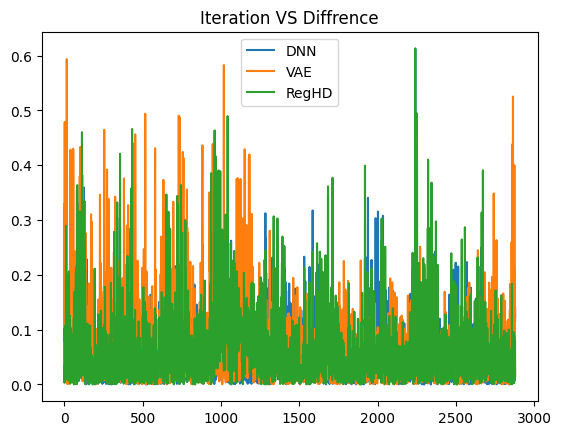

In [12]:
y = list(range(0,len(dif_dnn)))
dnn = [num[0][0] for num in dif_dnn]
vae = [num[0] for num in dif_vae]
reghd = [num.item() for num in dif_hd]

mean = [np.mean(dnn)] + [np.mean(vae)] + [np.mean(reghd)]
std = [np.std(dnn)] + [np.std(vae)] + [np.std(reghd)]
print(mean)
print(std)

plt.title("Iteration VS Diffrence")
plt.plot(y, dnn, "-")
plt.plot(y, vae, "-")
plt.plot(y, reghd, "-")
plt.legend(["DNN", 'VAE', "RegHD"])
#plt.xlim(0,200)
plt.show()